In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(100)
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('C:\\Users\\chiny\Downloads\\archive.zip').set_index('id')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [ ]:
df.info()

In [ ]:
df.describe()

Text(0.5, 1.0, 'Frequency of Fraud Status')

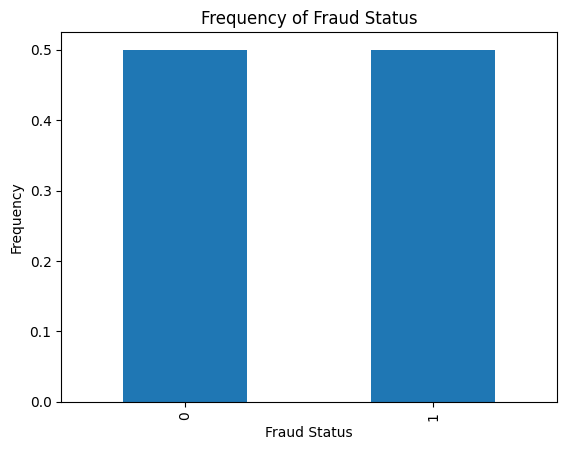

In [3]:
df['Class'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Fraud Status')
plt.title('Frequency of Fraud Status')

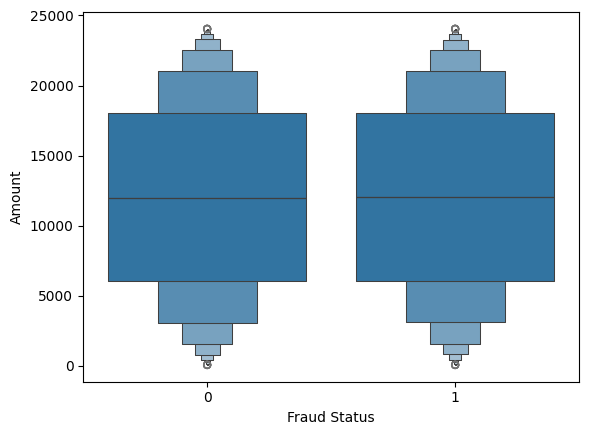

In [4]:
sns.boxenplot(df, x='Class', y='Amount')
plt.xlabel('Fraud Status')
plt.title(''); #Amount seems like a redundant feature. To be dropped in final model.

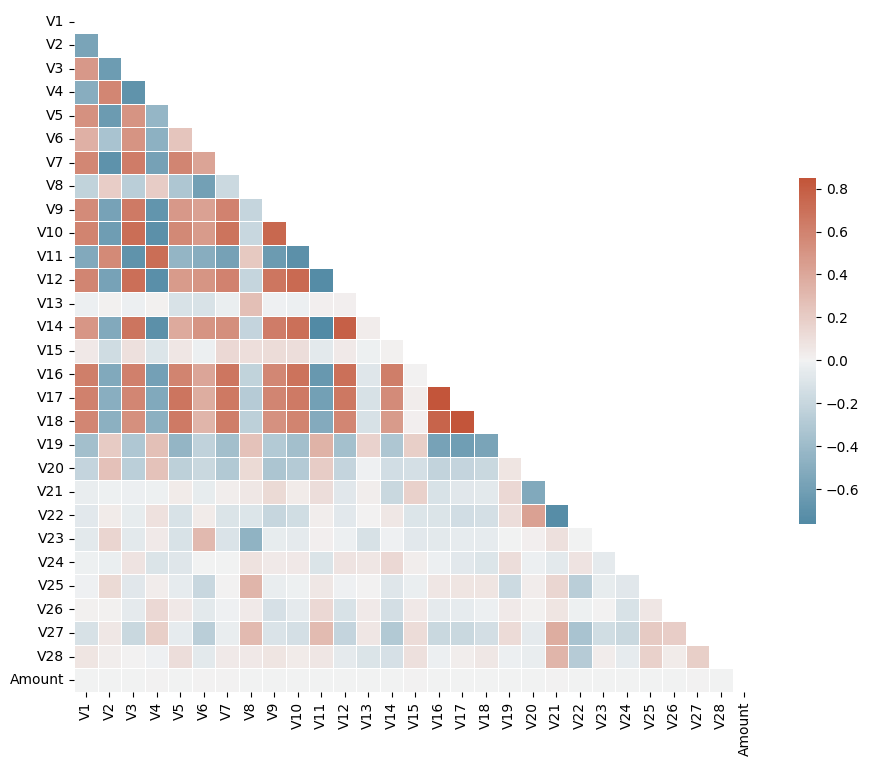

In [25]:
col_to_drop = ['Class']
corr = df.drop(columns=col_to_drop).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}); #High correlation between some variables noticed.

In [8]:
#Extract only highly correlated variables
threshold = 0.7

corr_pairs = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            column_name = corr.columns[i]
            corr_pairs.add(column_name)

selected_features = df[list(corr_pairs)]


In [9]:
selected_features

,V12,V14,V18,V10,V11,V22,V17
id,,,,,,,
0,0.293438,0.549020,0.333644,0.637735,-0.987020,0.217606,0.512307
1,1.564246,0.627719,0.201799,0.529808,0.140107,-0.605761,0.403810
2,0.659201,0.616874,0.239442,0.690708,-0.272985,0.702906,0.886526
3,0.737483,0.559535,2.178616,0.575231,-0.752581,-0.038212,0.242629
4,1.029577,0.241454,0.291782,0.968046,-1.203171,0.729727,0.366466
...,...,...,...,...,...,...,...
568625,-1.330500,-1.363454,-1.376970,-1.161847,1.430971,0.419731,-1.520928
568626,-0.539948,-0.812043,-0.664313,-0.210817,0.173590,0.388161,-0.575991
568627,-0.461849,-0.395126,-0.251679,-0.144495,0.477582,0.536523,-0.729002


In [10]:
corr = selected_features.corr()
corr

,V12,V14,V18,V10,V11,V22,V17
V12,1.000000,0.783878,0.579374,0.736783,-0.744642,-0.072096,0.658739
V14,0.783878,1.000000,0.469393,0.698939,-0.762322,0.052023,0.552428
V18,0.579374,0.469393,1.000000,0.596702,-0.519721,-0.135994,0.851366
V10,0.736783,0.698939,0.596702,1.000000,-0.713066,-0.150957,0.649149
V11,-0.744642,-0.762322,-0.519721,-0.713066,1.000000,0.022153,-0.601924
V22,-0.072096,0.052023,-0.135994,-0.150957,0.022153,1.000000,-0.144637
V17,0.658739,0.552428,0.851366,0.649149,-0.601924,-0.144637,1.000000


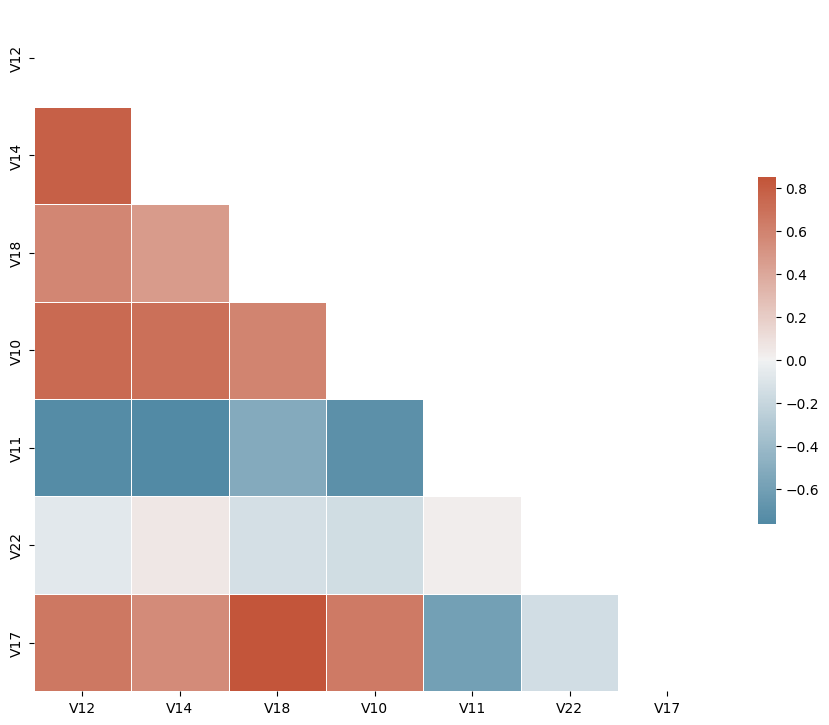

In [11]:
corr = selected_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [31]:
target = 'Class'
X = df.drop(columns=[target])
y = df[target]

In [32]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

##### Model 1

In [33]:
# define model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model1.add(tf.keras.layers.Dense(16, activation= "relu"))
model1.add(tf.keras.layers.Dense(8, activation= "relu"))
model1.add(tf.keras.layers.Dense(4, activation= "relu"))
model1.add(tf.keras.layers.Dense(1))

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

In [35]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
3110/3110 [==============================] - 14s 4ms/step - loss: 5.2431 - accuracy: 0.5968 - val_loss: 0.6857 - val_accuracy: 0.5079
Epoch 2/20
3110/3110 [==============================] - 12s 4ms/step - loss: 0.6837 - accuracy: 0.5102 - val_loss: 0.6927 - val_accuracy: 0.5020
Epoch 3/20
 362/3110 [==>...........................] - ETA: 9s - loss: 0.6924 - accuracy: 0.5031

KeyboardInterrupt: 

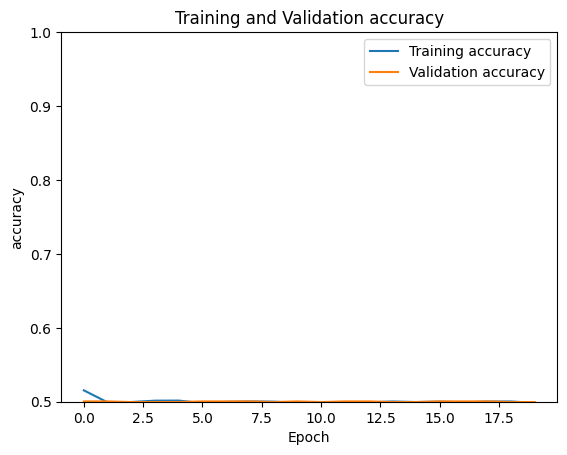

In [11]:
def plot_training_history(history, train_metric, val_metric):
    train_accuracy = history.history[f'{train_metric}']
    val_accuracy = history.history[f'{val_metric}']
    plt.plot(train_accuracy, label=f'Training {train_metric}')
    plt.plot(val_accuracy, label=f'Validation {train_metric}')
    plt.xlabel('Epoch')
    plt.ylim(0.5, 1)
    plt.ylabel(f'{train_metric}')
    plt.title(f'Training and Validation {train_metric}')
    plt.legend()
    plt.show()

plot_training_history(history1,'accuracy', 'val_accuracy')

##### Model 2

In [12]:
target = 'Class'
X = df.drop(columns=[target, 'Amount'])
y = df[target]

In [13]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [14]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model2.add(tf.keras.layers.Dense(16, activation= "relu"))
model2.add(tf.keras.layers.Dense(8, activation= "relu"))
model2.add(tf.keras.layers.Dense(4, activation= "relu"))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

In [16]:
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
3110/3110 [==============================] - 15s 4ms/step - loss: 0.0407 - accuracy: 0.9902 - val_loss: 0.0148 - val_accuracy: 0.9955
Epoch 2/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0088 - val_accuracy: 0.9974
Epoch 3/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 4/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0105 - val_accuracy: 0.9975
Epoch 5/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 6/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9986
Epoch 7/20
3110/3110 [==============================] - 13s 4ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0072 - val_ac

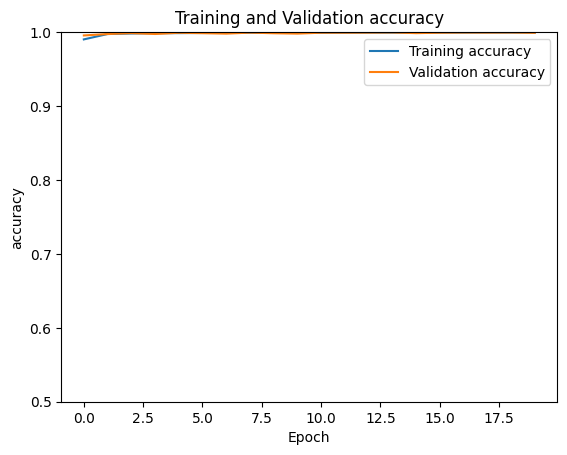

In [17]:
plot_training_history(history2,'accuracy', 'val_accuracy')

##### Model 3

In [18]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(8, activation= "relu"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
3110/3110 [==============================] - 17s 5ms/step - loss: 0.1641 - accuracy: 0.9394 - val_loss: 0.0776 - val_accuracy: 0.9667
Epoch 2/20
3110/3110 [==============================] - 15s 5ms/step - loss: 0.1448 - accuracy: 0.9471 - val_loss: 0.0674 - val_accuracy: 0.9716
Epoch 3/20
3110/3110 [==============================] - 15s 5ms/step - loss: 0.1376 - accuracy: 0.9485 - val_loss: 0.0550 - val_accuracy: 0.9784
Epoch 4/20
3110/3110 [==============================] - 16s 5ms/step - loss: 0.1317 - accuracy: 0.9499 - val_loss: 0.0568 - val_accuracy: 0.9766
Epoch 5/20
3110/3110 [==============================] - 15s 5ms/step - loss: 0.1308 - accuracy: 0.9498 - val_loss: 0.0514 - val_accuracy: 0.9788
Epoch 6/20
3110/3110 [==============================] - 15s 5ms/step - loss: 0.1289 - accuracy: 0.9507 - val_loss: 0.0553 - val_accuracy: 0.9773
Epoch 7/20
3110/3110 [==============================] - 15s 5ms/step - loss: 0.1279 - accuracy: 0.9504 - val_loss: 0.0511 - val_ac

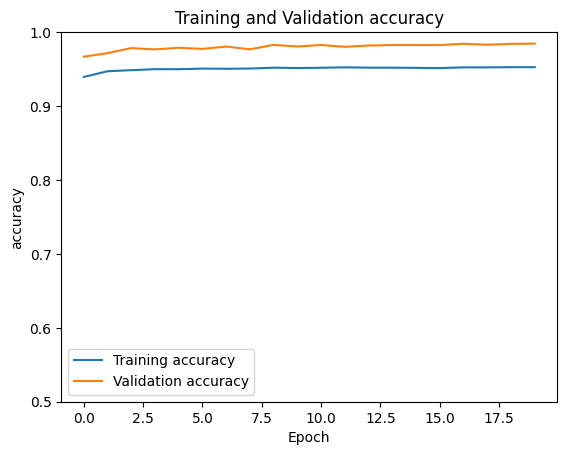

In [21]:
plot_training_history(history3,'accuracy', 'val_accuracy')

##### Model 4

In [22]:
# define model
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(16, activation= "relu"))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(8, activation= "relu"))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(4, activation= "relu"))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
3110/3110 [==============================] - 21s 6ms/step - loss: 0.0954 - accuracy: 0.9675 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 2/20
3110/3110 [==============================] - 18s 6ms/step - loss: 0.0633 - accuracy: 0.9798 - val_loss: 0.0246 - val_accuracy: 0.9915
Epoch 3/20
3110/3110 [==============================] - 18s 6ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0190 - val_accuracy: 0.9933
Epoch 4/20
3110/3110 [==============================] - 18s 6ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0152 - val_accuracy: 0.9951
Epoch 5/20
3110/3110 [==============================] - 18s 6ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0142 - val_accuracy: 0.9966
Epoch 6/20
3110/3110 [==============================] - 18s 6ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0137 - val_accuracy: 0.9967
Epoch 7/20
2237/3110 [====================>.........] - ETA: 4s - loss: 0.0520 - accuracy: 0.9845

KeyboardInterrupt: 

In [ ]:
plot_training_history(history4,'accuracy', 'val_accuracy')

##### Model 5

In [ ]:
# define model
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model5.add(tf.keras.layers.Dense(8, activation= "relu"))
model5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history5 = model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

In [ ]:
plot_training_history(history5,'accuracy', 'val_accuracy')

##### Model 6

In [ ]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))
model6.add(tf.keras.layers.Dense(8, activation= "relu"))
model6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history6 = model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, verbose=1)

In [ ]:
plot_training_history(history6,'accuracy', 'val_accuracy')

##### Model 5 (with L2 regularisation)

In [ ]:
# define model
model5_l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model5_l2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history5_l2 = model5_l2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, verbose=1)

In [ ]:
plot_training_history(history5_l2,'accuracy', 'val_accuracy')

##### Best Model (Using Validation Accuracy)

In [ ]:
print('Model 1 Maximum Training Accuracy: ',round(max(history1.history['accuracy']),5))
print('Model 2 Maximum Training Accuracy: ',round(max(history2.history['accuracy']),5))
print('Model 3 Maximum Training Accuracy: ',round(max(history3.history['accuracy']),5))
print('Model 4 Maximum Training Accuracy: ',round(max(history4.history['accuracy']),5))
print('Model 5 Maximum Training Accuracy: ',round(max(history5.history['accuracy']),5))
print('Model 5_L2 Maximum Training Accuracy: ',round(max(history5_l2.history['accuracy']),5))
print('Model 6 Maximum Training Accuracy: ',round(max(history6.history['accuracy']),5))

In [ ]:
print('Model 1 Maximum Validation Accuracy: ',round(max(history1.history['val_accuracy']),5))
print('Model 2 Maximum Validation Accuracy: ',round(max(history2.history['val_accuracy']),5))
print('Model 3 Maximum Validation Accuracy: ',round(max(history3.history['val_accuracy']),5))
print('Model 4 Maximum Validation Accuracy: ',round(max(history4.history['val_accuracy']),5))
print('Model 5 Maximum Validation Accuracy: ',round(max(history5.history['val_accuracy']),5))
print('Model 5_L2 Maximum Validation Accuracy: ',round(max(history5_l2.history['val_accuracy']),5))
print('Model 6 Maximum Validation Accuracy: ',round(max(history6.history['val_accuracy']),5))

In [ ]:
val_accuracy = history5.history['val_accuracy']

best_epoch = val_accuracy.index(max(val_accuracy)) + 1

print('Best epoch:', best_epoch)

In [ ]:
weights_file_path = f'model5_weights_at_epoch_{best_epoch}.keras'

model5.save_weights(weights_file_path)

print(f'Model weights successfully saved to "{weights_file_path}".')

In [ ]:
model5.load_weights(f'model5_weights_at_epoch_{best_epoch}.keras')

##### Evaluating model on testing data

In [ ]:
test_loss, test_accuracy = model5.evaluate(X_test, y_test)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

threshold = 0.98

if test_accuracy > threshold:
    model5.save('best_model.keras')
    print('Model has been saved successfully')

In [ ]:
def dynamic_threshold(y_prob, criterion):
    if criterion == 'static':
        return 0.5
    elif criterion == 'quantile':
        threshold = np.percentile(y_prob, 50)
        return threshold
    else:
        return 0.5

In [ ]:
best_model = load_model('best_model.keras')
y_pred_prob = best_model.predict(X_test)

criterion = 'quantile'

threshold = dynamic_threshold(y_pred_prob, criterion)

y_pred = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)